# TASK 1- TITANIC SURVIVAK PREDICTION


##### ANAGHA M BASHEER

###  DATA DESCRIPTION

The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket, class, fare, cabin, and whether or not they survived. The variables available are:
- survived - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Here the target variable is Surived

### IMPORTING THE PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import std
import matplotlib.pyplot as plt

### IMPORTING THE DATASET 

In [2]:
df2=pd.read_csv(r"C:\Users\anagh\Downloads\tested.csv")

### EXPLORATORY DATA ANALYSIS 

In [3]:
print('Table 1')
df2.head() #to print the firts 5 rows of the dataset

Table 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df2.shape #to know the dimension of the dataset

(418, 12)

There are 418 observations on each of the 12 columns.

In [5]:
print('Table 2')
df2.info() #information table

Table 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


From the information table we can observe that some of the variables are objects which we need to convert it into integers.

In [6]:
#to check the presence of null values
print('Table 3')
df2.isnull().sum()

Table 3


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

From here we can observe that the variables Age, Fare and Cabin have null values which we need to replace. Here Cabin is a variale we need to drop.

In [7]:
#Replaving the null values by their corresponding mean values
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].mean())

In [8]:
#Dropping the unwanted variables
data = df2.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

In [9]:
#now we can check the head of the dataframe after droppimg the unwanted variables and replacing the null values
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


The  variables Sex and Embarked are objects,they should be converted into integers.

In [10]:
#Label encoding 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'sex'.
df2['Sex']= label_encoder.fit_transform(df2['Sex'])
  
df2['Sex'].unique()

array([1, 0])

In [11]:
df2['Embarked']= label_encoder.fit_transform(df2['Embarked'])
  df2['Embarked'].unique()

array([1, 2, 0])

In [12]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


Now we can observe that all the variables are in numerical.

### STUDYING THE TARGET VARIABLE

In [13]:
df2['Survived'].unique()

array([0, 1], dtype=int64)

There are two unique values for the target variable Survived, 0( Not survived) and 1(Survived).

In [14]:
df2['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

152 passengers survived while 266 passengers not survived.

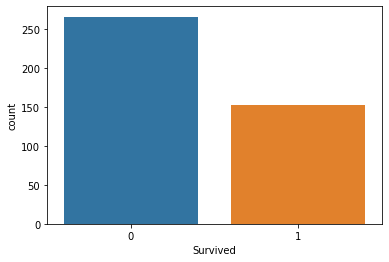

In [15]:
#Plotting the target variable
sns.countplot(x='Survived',data=df2)
plt.show()

In [16]:
count_0 = len(df2[df2['Survived']==0])
count_1 = len(df2[df2['Survived']==1])
pct_of_0 = count_0/(count_0+count_1)
print("percentage of passengers not survived:", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("percentage of passengers survived:", pct_of_1*100)

percentage of passengers not survived: 63.63636363636363
percentage of passengers survived: 36.36363636363637


63% of passengers not survived while 34% of passengers survived.

### RELATIONSHIP BETWEEN SURVIVAL AND FEATURES

Text(0, 0.5, 'Survived')

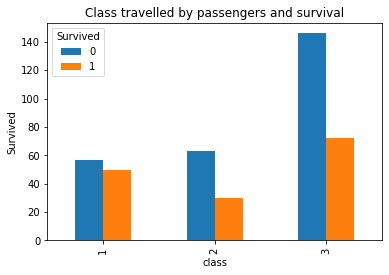

In [17]:
#Plot between the class travelled by the passengers and survival
pd.crosstab(df2.Pclass,df2.Survived).plot(kind='bar')
plt.title('Class travelled by passengers and survival')
plt.xlabel('class')
plt.ylabel('Survived')

From the above plot we can observe that the most passengers who were not survived are from the 3rd class. While the proportion of passengers not survived are less in first class and second class as compared to third class.

Text(0, 0.5, 'Survivers')

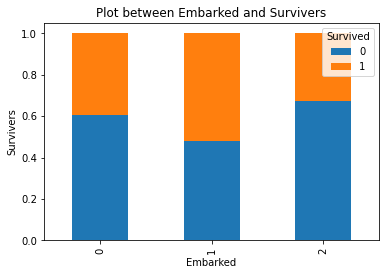

In [18]:
#Plot between the port enbarked by the passengers and survival
table=pd.crosstab(df2.Embarked,df2.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Plot between Port Embarked and Survivers')
plt.xlabel('Port Embarked')
plt.ylabel('Survivers')

From the above plot we can observe that the most passengers who were not survived are from the passengers embarked from the 2nd port which is Southampton.While the more passengers boarded from the 1st port which is QueensTown.

Text(0, 0.5, 'Survived')

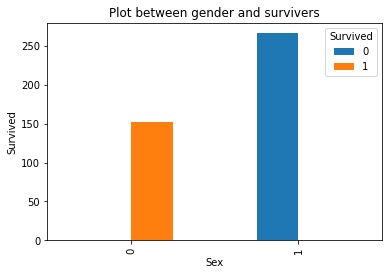

In [19]:
#Plot between the sex of the passengers and survival
pd.crosstab(df2.Sex,df2.Survived).plot(kind='bar')
plt.title('Plot between gender and survivers')
plt.xlabel('Sex')
plt.ylabel('Survived')

From the above plot we can observe that almost all female passengers were survived While almost all male paasengers were not survived.

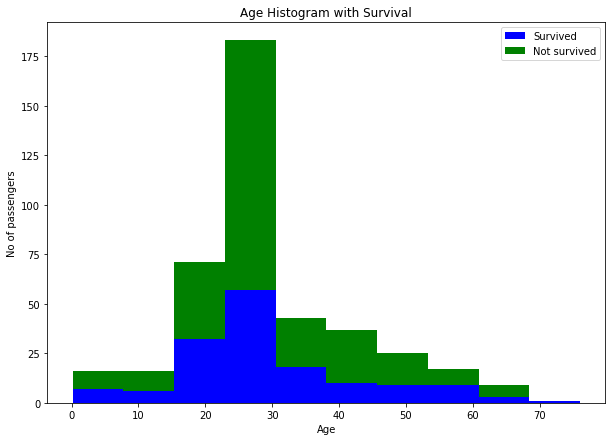

In [22]:
#histogram between the age of the passengers and survival
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df2[df2['Survived']==1]['Age'], df2[df2['Survived']==0]['Age']],stacked=True, color = ['b','g'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

From the above plot we can observe that most passengers who were not survived are form the age group 25-30 since many of the passengers were from the same age group .

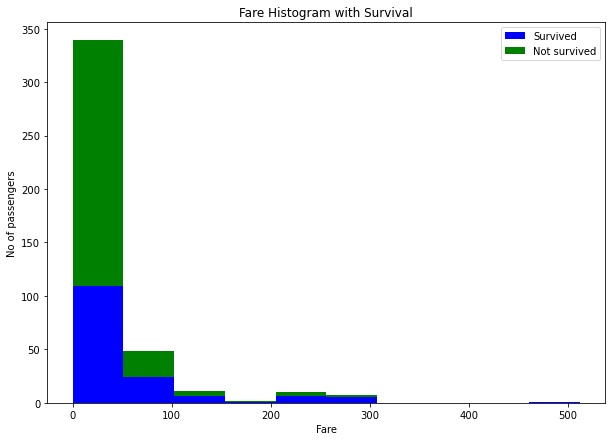

In [23]:
#histogram between the fare and survival
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df2[df2['Survived']==1]['Fare'], df2[df2['Survived']==0]['Fare']], stacked=True, color = ['b','g'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

From the above plot we can observe that most passengers who were not survived were the passengers who paid less fares as compared to the ones who paid high fares.

### BUILDING A LOGISTIC CLASSIFICATION MODEL

In [24]:
#Defining x(features) and y(target variable)
X = df2.loc[:, df2.columns != 'Survived']
y = df2.loc[:, df2.columns == 'Survived']

In [25]:
#splitting the dataset into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
#fitting a logistic regression model
y_train=y_train.squeeze()
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter = 20000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=20000)

### PREDICTION AND CALCULATING THE ACCURACY MEASURES

In [27]:
#Accuracy score
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score*100

100.0

Since the accuracy measure is 1, we can say that the model is a perfect fit.

In [28]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[71  0]
 [ 0 55]]


Confusion matrix explains that 71 0's are classified as 0's,55 1's are classified as 1's. That is 71+55 are the number of correct predictions. There are zero wrong classifications.

In [29]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        55

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



The above report prints precision, recall, F-beta score and support.

Precision is the ratio of TP to the sum of TP and FP (1 is best and O is worst).It measures the ability of a classifier not to label an obervation as positive if its negative.Here we can observe that the precision of all classes are 1 , hence we can say it is a perfecr fit.

Recall is the ratio of TP to the sum of TP and FN (1 is best and O is worst).It measures the ability of a classifier to lablel all postive observations.Here we can observe that the recall of all classes except 0 are more than 1 , hence we can say it is a perfect fit.

The F-measure is calculated as the harmonic mean of precision and recall, giving each the same weighting. It allows a model to be evaluated taking both the precision and recall into account using a single score. Here the average of the f1-score is 1 . Hence we can say the fitted model is a perfect one for prediction.